In [1]:
# Install required libraries
!pip install pandas matplotlib seaborn gdown

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from google.colab import files

In [2]:
# Option 1: Upload CSV files manually
print("Upload transaksi.csv, aset.csv, and kebijakan_fiskal.csv")
uploaded = files.upload()

Upload transaksi.csv, aset.csv, and kebijakan_fiskal.csv


Saving aset.csv to aset (1).csv
Saving kebijakan_fiskal.csv to kebijakan_fiskal (1).csv
Saving transaksi.csv to transaksi (1).csv


In [4]:
# Load CSV files into DataFrames
transaksi = pd.read_csv('transaksi.csv')
aset = pd.read_csv('aset.csv')
kebijakan_fiskal = pd.read_csv('kebijakan_fiskal.csv')

In [7]:
# Data Processing (Simulasi BAB III in Python)
# 1. Laba Kotor per Tahun (Skenario Normal) - Fixed for DeprecationWarning
laba_kotor = transaksi[transaksi['skenario'] == 'normal'].groupby('tahun').agg({
    'pendapatan': 'sum',
    'beban_operasional': 'sum',
    'penyusutan': 'sum'
}).reset_index()
laba_kotor['laba_kotor'] = laba_kotor['pendapatan'] - (laba_kotor['beban_operasional'] + laba_kotor['penyusutan'])

In [9]:
# 2. PPh Badan (Normal vs Tax Holiday)
merged_df = transaksi.merge(kebijakan_fiskal, on='tahun')
pph_badan = merged_df.groupby(['tahun', 'skenario']).apply(
    # Access 'tahun' and 'skenario' from the group name (index)
    lambda x: pd.Series({
        'laba_kena_pajak': (x['pendapatan'] - (x['beban_operasional'] + x['penyusutan'])).sum(),
        'pph_badan': 0 if (x.name[0] >= x['tax_holiday_awal'].iloc[0] and
                           x.name[0] <= x['tax_holiday_akhir'].iloc[0] and
                           x.name[1] == 'tax_holiday')
                     else (x['pendapatan'] - (x['beban_operasional'] + x['penyusutan'])).sum() * x['tax_rate'].iloc[0]
    }), include_groups=False
).reset_index()

In [10]:
# 3. Perbandingan Depresiasi
aset['depresiasi_tahunan'] = aset.apply(
    lambda x: x['nilai_perolehan'] / x['umur_ekonomis'] if x['metode'] == 'garis_lurus'
              else x['nilai_perolehan'] * 0.25, axis=1
)

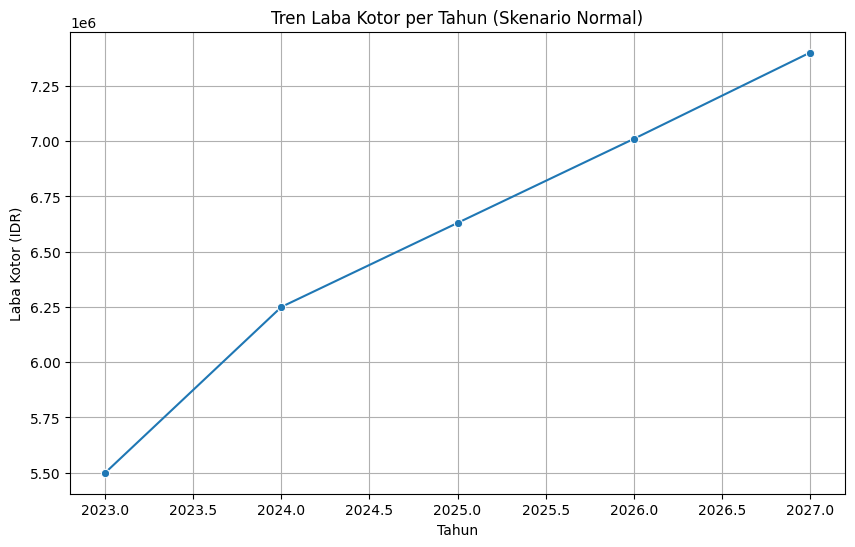

In [11]:
# Visualization (BAB IV)
# 1. Tren Laba Kotor (Skenario Normal)
plt.figure(figsize=(10, 6))
sns.lineplot(data=laba_kotor, x='tahun', y='laba_kotor', marker='o')
plt.title('Tren Laba Kotor per Tahun (Skenario Normal)')
plt.xlabel('Tahun')
plt.ylabel('Laba Kotor (IDR)')
plt.grid(True)
plt.show()

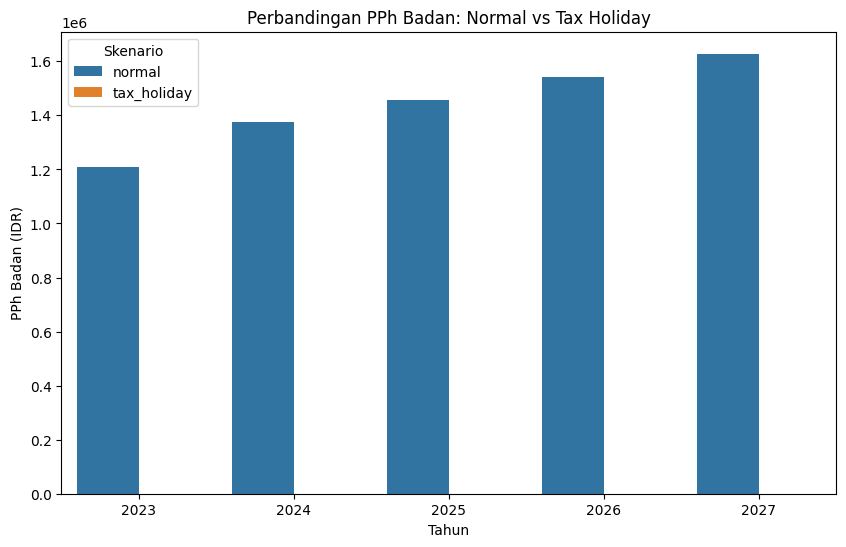

In [12]:
# 2. Perbandingan PPh Badan (Normal vs Tax Holiday)
plt.figure(figsize=(10, 6))
sns.barplot(data=pph_badan, x='tahun', y='pph_badan', hue='skenario')
plt.title('Perbandingan PPh Badan: Normal vs Tax Holiday')
plt.xlabel('Tahun')
plt.ylabel('PPh Badan (IDR)')
plt.legend(title='Skenario')
plt.show()

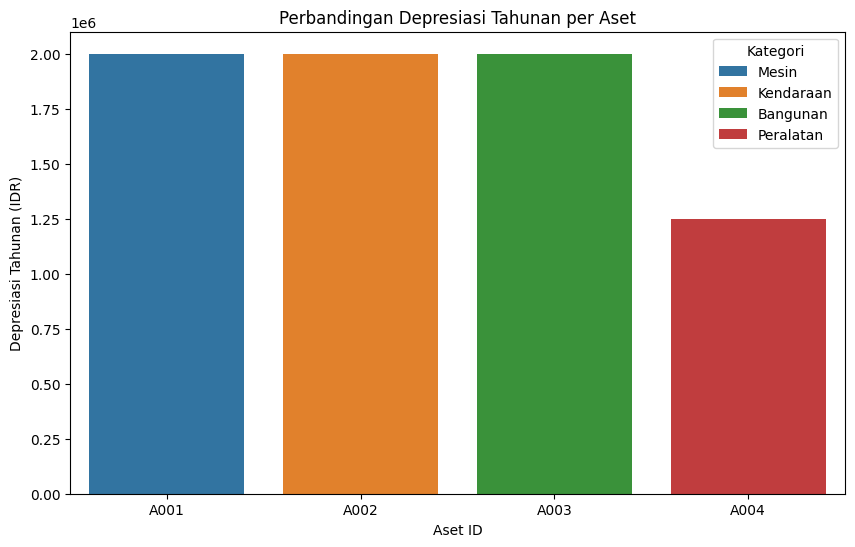

In [13]:
# 3. Perbandingan Depresiasi
plt.figure(figsize=(10, 6))
sns.barplot(data=aset, x='aset_id', y='depresiasi_tahunan', hue='kategori')
plt.title('Perbandingan Depresiasi Tahunan per Aset')
plt.xlabel('Aset ID')
plt.ylabel('Depresiasi Tahunan (IDR)')
plt.legend(title='Kategori')
plt.show()

In [14]:
# Narasi Analitis (BAB V)
print("=== Narasi Analitis ===")
print("1. Tren Laba Kotor:")
print(f"Laba kotor pada skenario normal menunjukkan tren meningkat dari {laba_kotor['laba_kotor'].min():,.0f} IDR pada tahun {laba_kotor.loc[laba_kotor['laba_kotor'].idxmin(), 'tahun']} hingga {laba_kotor['laba_kotor'].max():,.0f} IDR pada tahun {laba_kotor.loc[laba_kotor['laba_kotor'].idxmax(), 'tahun']}.")
print("\n2. Dampak Tax Holiday:")
print("PPh Badan pada skenario tax holiday bernilai 0 selama periode 2023-2027, memberikan penghematan pajak signifikan dibandingkan skenario normal, yang memiliki PPh hingga", f"{pph_badan[pph_badan['skenario'] == 'normal']['pph_badan'].max():,.0f} IDR.")
print("\n3. Perbandingan Depresiasi:")
print("Metode garis lurus menghasilkan depresiasi konsisten setiap tahun (misalnya,", f"{aset[aset['metode'] == 'garis_lurus']['depresiasi_tahunan'].iloc[0]:,.0f} IDR untuk A001), sedangkan metode saldo menurun memberikan depresiasi lebih besar di tahun pertama (misalnya,", f"{aset[aset['metode'] == 'saldo_menurun']['depresiasi_tahunan'].iloc[0]:,.0f} IDR untuk A002).")

=== Narasi Analitis ===
1. Tren Laba Kotor:
Laba kotor pada skenario normal menunjukkan tren meningkat dari 5,500,000 IDR pada tahun 2023 hingga 7,400,000 IDR pada tahun 2027.

2. Dampak Tax Holiday:
PPh Badan pada skenario tax holiday bernilai 0 selama periode 2023-2027, memberikan penghematan pajak signifikan dibandingkan skenario normal, yang memiliki PPh hingga 1,628,000 IDR.

3. Perbandingan Depresiasi:
Metode garis lurus menghasilkan depresiasi konsisten setiap tahun (misalnya, 2,000,000 IDR untuk A001), sedangkan metode saldo menurun memberikan depresiasi lebih besar di tahun pertama (misalnya, 2,000,000 IDR untuk A002).


In [15]:
# Integrasi AI (BAB VI) - Simulasi tanpa API key
print("\n=== Integrasi AI (Simulasi) ===")
prompt = f"""
Jelaskan dampak penerapan tax holiday terhadap PPh tahun 2025 berdasarkan output berikut:
{pph_badan[pph_badan['tahun'] == 2025][['tahun', 'skenario', 'laba_kena_pajak', 'pph_badan']].to_string()}
"""
print("Prompt untuk AI:")
print(prompt)

# Simulasi respons AI
print("\nSimulasi Respons AI:")
print("Berdasarkan data, pada tahun 2025, skenario tax holiday menghasilkan PPh Badan sebesar 0 karena periode tax holiday berlaku (2023-2027). Ini mengurangi beban pajak perusahaan, memungkinkan alokasi dana untuk investasi atau ekspansi, dibandingkan skenario normal yang memiliki PPh Badan", f"{pph_badan[(pph_badan['tahun'] == 2025) & (pph_badan['skenario'] == 'normal')]['pph_badan'].iloc[0]:,.0f} IDR.")


=== Integrasi AI (Simulasi) ===
Prompt untuk AI:

Jelaskan dampak penerapan tax holiday terhadap PPh tahun 2025 berdasarkan output berikut:
   tahun     skenario  laba_kena_pajak  pph_badan
4   2025       normal        6630000.0  1458600.0
5   2025  tax_holiday        8530000.0        0.0


Simulasi Respons AI:
Berdasarkan data, pada tahun 2025, skenario tax holiday menghasilkan PPh Badan sebesar 0 karena periode tax holiday berlaku (2023-2027). Ini mengurangi beban pajak perusahaan, memungkinkan alokasi dana untuk investasi atau ekspansi, dibandingkan skenario normal yang memiliki PPh Badan 1,458,600 IDR.
